**A script to generate some plots for the report**

# Frustum generation

- Need to plot 3 frustums to show the enclosing area of the ellipsoid

In [8]:
### Import modules ###

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


%matplotlib notebook

In [2]:
# def plot_frustum(base_radius, top_radius, height):
#     """
#     Plot a frustum using Matplotlib.

#     Args:
#         base_radius (float): Radius of the base of the frustum.
#         top_radius (float): Radius of the top of the frustum.
#         height (float): Height of the frustum.

#     Returns:
#         None
#     """
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     # Define the vertices of the frustum
#     vertices = np.array([
#         [base_radius, 0, 0],
#         [top_radius, 0, height],
#         [top_radius, 0, 0],
#         [base_radius, 0, height],
#         [0, base_radius, 0],
#         [0, top_radius, height],
#         [0, top_radius, 0],
#         [0, base_radius, height]
#     ])

#     # Define the faces of the frustum
#     faces = [[vertices[0], vertices[2], vertices[1], vertices[3]],
#              [vertices[4], vertices[6], vertices[5], vertices[7]],
#              [vertices[0], vertices[4], vertices[7], vertices[3]],
#              [vertices[1], vertices[2], vertices[6], vertices[5]],
#              [vertices[1], vertices[5], vertices[7], vertices[3]],
#              [vertices[0], vertices[2], vertices[6], vertices[4]]]

#     # Plot the frustum
#     frustum = Poly3DCollection(faces, linewidths=1, edgecolors='k', alpha=0.5)
#     ax.add_collection3d(frustum)

#     # Set axis limits
#     ax.set_xlim([-(base_radius + 1), base_radius + 1])
#     ax.set_ylim([-(base_radius + 1), base_radius + 1])
#     ax.set_zlim([0, height + 1])

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')

#     plt.title('Frustum')
#     plt.show()

# # Example usage:
# base_radius = 3.0
# top_radius = 2.0
# height = 4.0

# plot_frustum(base_radius, top_radius, height)

In [9]:
def plot_pyramid(base_vertices, apex, ax, c):
    """
    Plot a pyramid using Matplotlib.

    Args:
        base_vertices (list of tuples): List of 3D points representing the vertices of the pyramid's base.
        apex (tuple): 3D point representing the apex (vertex) of the pyramid.

    Returns:
        None
    """

    # Define the vertices of the pyramid
    vertices = np.array(base_vertices + [apex])

    # Define the faces of the pyramid
    faces = [[vertices[0], vertices[1], vertices[4]],
             [vertices[1], vertices[2], vertices[4]],
             [vertices[2], vertices[3], vertices[4]],
             [vertices[3], vertices[0], vertices[4]]]

    # Plot the pyramid
    pyramid = Poly3DCollection(faces, linewidths=1, edgecolors='k', facecolors = c, alpha=0.1)
    ax.add_collection3d(pyramid)

    # Set axis limits
    x_coords, y_coords, z_coords = zip(*vertices)
    max_range = max(max(x_coords) - min(x_coords),
                    max(y_coords) - min(y_coords),
                    max(z_coords) - min(z_coords))
    mean_x = np.mean(x_coords)
    mean_y = np.mean(y_coords)
    mean_z = np.mean(z_coords)
    ax.set_xlim(mean_x - max_range / 2, mean_x + max_range / 2)
    ax.set_ylim(mean_y - max_range / 2, mean_y + max_range / 2)
    ax.set_zlim(mean_z - max_range / 2, mean_z + max_range / 2)

    
    plt.show()

# # Example usage:
# base_vertices = [(1, 1, 0), (5, 1, 0), (5, 5, 0), (1, 5, 0)]  # Vertices of the square base
# apex = (3, 3, 5)  # Apex of the pyramid

# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111, projection='3d')
# plot_pyramid(base_vertices, apex, ax, 'b')


In [10]:
# ## Final plot

# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111, projection='3d')

# base_vertices1 = [(1, 1, 0), (5, 1, 0), (5, 5, 0), (1, 5, 0)]
# apex1 = (3, 3, 5)
# plot_pyramid(base_vertices1, apex1, ax)

# # Turn off the axis
# # plt.axis('off')

# # Turn off the grid lines
# plt.grid(False)

In [11]:
def create_transform_matrix(translation, rotation):
    # Create the 3x3 rotation matrix from the given rotation angles (in radians)
    R = np.array([[np.cos(rotation[2]) * np.cos(rotation[1]), -np.sin(rotation[2]) * np.cos(rotation[0]) + np.cos(rotation[2]) * np.sin(rotation[1]) * np.sin(rotation[0]), np.sin(rotation[2]) * np.sin(rotation[0]) + np.cos(rotation[2]) * np.sin(rotation[1]) * np.cos(rotation[0])],
                  [np.sin(rotation[2]) * np.cos(rotation[1]), np.cos(rotation[2]) * np.cos(rotation[0]) + np.sin(rotation[2]) * np.sin(rotation[1]) * np.sin(rotation[0]), -np.cos(rotation[2]) * np.sin(rotation[0]) + np.sin(rotation[2]) * np.sin(rotation[1]) * np.cos(rotation[0])],
                  [-np.sin(rotation[1]), np.cos(rotation[1]) * np.sin(rotation[0]), np.cos(rotation[1]) * np.cos(rotation[0])]])

    # Create the 3x1 translation vector
    T = np.array(translation).reshape(3, 1)

    # Create the 4x4 transformation matrix
    T_matrix = np.eye(4)
    T_matrix[:3, :3] = R
    T_matrix[:3, 3] = T.flatten()

    return T_matrix

# Example usage:
# Define the translation vector and rotation angles (in radians)
translation_vector = [0, 0, 10]
rotation_angles = [0, np.pi / 5, 0]

# Create the transformation matrix
T_matrix = create_transform_matrix(translation_vector, rotation_angles)

# # Example 3D point
# P = np.array([2, 3, 4])

# # Add the homogeneous coordinate (1) to the 3D point
# P_homogeneous = np.append(P, 1)

# # Perform the transformation
# P_transformed_homogeneous = T_matrix @ P_homogeneous

# # Get the transformed 3D point
# P_transformed = P_transformed_homogeneous[:3]

<IPython.core.display.Javascript object>


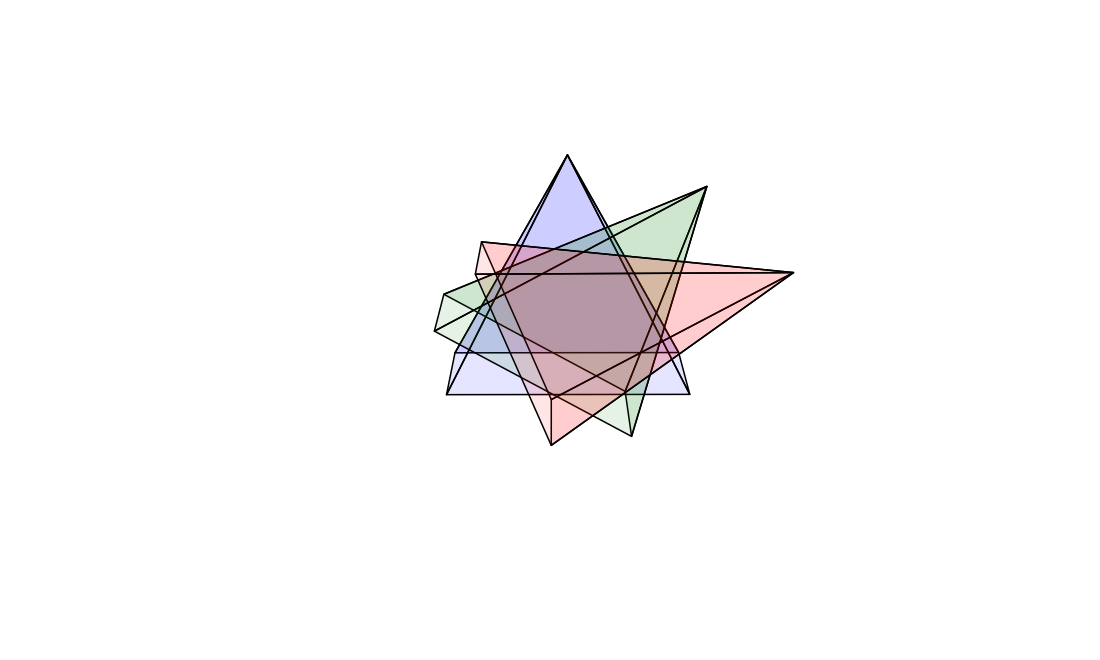

In [12]:
points = [(3, 3, 5), (1, 1, 0), (5, 1, 0), (5, 5, 0), (1, 5, 0)]

col = ['b', 'g', 'r']

for i in range(len(points)):
    points[i] = tuple(element * 5 for element in points[i])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

plot_pyramid(points[1:], points[0], ax, col[0])

for j in range(1,3):
    for i in range(5):
        P_homogeneous = np.append(np.array(points[i]), 1)
        P_transformed_homogeneous = T_matrix @ P_homogeneous
        points[i] = tuple(P_transformed_homogeneous[:3])
    plot_pyramid(points[1:], points[0], ax, col[j])
    

# Turn off the axis
plt.axis('off')

# Turn off the grid lines
plt.grid(False)

<IPython.core.display.Javascript object>


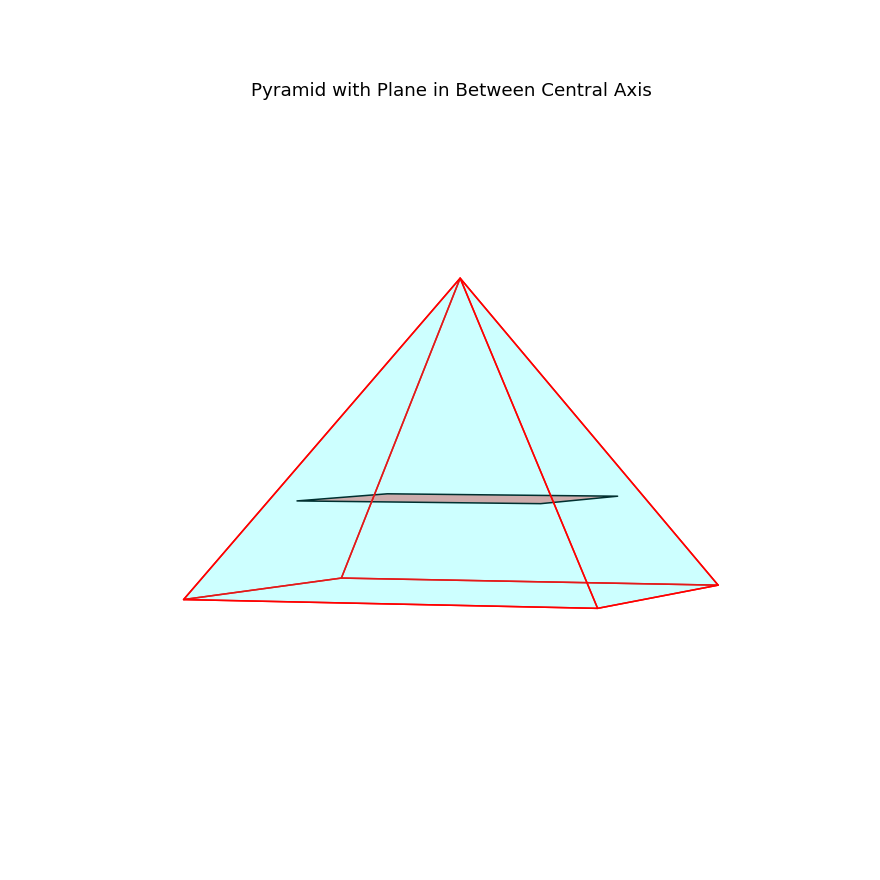

In [13]:
# Define the vertices of the pyramid
vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0.5, 0.5, 1]])

# Define the faces of the pyramid using the vertices' indices
faces = [[vertices[0], vertices[1], vertices[4]],
         [vertices[1], vertices[2], vertices[4]],
         [vertices[2], vertices[3], vertices[4]],
         [vertices[3], vertices[0], vertices[4]],
         [vertices[0], vertices[1], vertices[2], vertices[3]]]

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the pyramid faces
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.1))

# Define the plane in the center of the pyramid
plane_vertices = np.array([[0.2, 0.2, 0.3], [0.8, 0.2, 0.3], [0.8, 0.8, 0.3], [0.2, 0.8, 0.3]])
plane_face = [[plane_vertices[0], plane_vertices[1], plane_vertices[2], plane_vertices[3]]]

# Plot the plane
ax.add_collection3d(Poly3DCollection(plane_face, facecolors='red', linewidths=1, edgecolors='k', alpha=0.4))

# Set plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.title('Pyramid with Plane in Between Central Axis')

# Turn off the axis
plt.axis('off')

# Turn off the grid lines
plt.grid(False)

plt.show()
